# **EXERCÍCIO Algoritmo XGBoost**

**Objetivo:**
O objetivo deste exercício é fazer o teste do algoritmo XGBoost utilizando outra base de dados. Você pode se basear nos códigos anteriores e carregar o arquivo credit_card_clients.csv, que apresenta dados referente à gastos no cartão de crédito. Segue abaixo algumas informações:



- Existem as colunas BILL_AMT que representam as despesas nos últimos 6 meses. Crie uma nova coluna no dataframe chamada BILL_TOTAL, que será o somatório das despesas
- [x] Concluído

- Existem as colunas PAY_AMT que representam os valores pagos nos últimos 6 meses. Crie uma nova coluna no dataframe chamada PAY_TOTAL, que será o somatório dos valores pagos
- [X] Concluído

- Mantenha do dataframe somente as duas novas colunas, a idade (atributo age) e o LIMIT_BAL
- [X] Concluído

- O atributo LIMIT_BAL é o nosso objetivo, ou seja: por meio do BILL_TOTAL, PAY_TOTAL e da idade (AGE), vamos prever o limite do cartão de crédito. O dataframe final terá uma aparência parecida com a imagem abaixo
- [X] Concluído


Após processar a base de dados, execute o algoritmo XGBoost para verificar os resultados. Na sequência você pode assistir o vídeo com a solução.

Bom trabalho!

Jones

## Bibliotecas

In [1]:
# Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Base de Dados

In [2]:
# Dados 
df = pd.read_csv('./data/credit_card_clients.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Pre-Processamento

In [3]:
# Descrição 
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
# informação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
# Valores nulos
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
# Criando uma nova coluna com total de gasto no cartão
df['BILL_TOTAL'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,109339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,725349
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,21182
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,70496
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,266611


In [7]:
# Criando uma nova coluna com total pago no cartão
df['PAY_TOTAL'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL,PAY_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,7704,689
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,17077,5000
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,101653,11018
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,231334,8388
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,109339,59049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,725349,42550
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,1837,3526,8998,129,0,0,0,21182,14490
29997,29998,30000,1,2,2,37,4,3,2,-1,...,19357,0,0,22000,4200,2000,3100,1,70496,31300
29998,29999,80000,1,3,1,41,1,-1,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,266611,147181


In [8]:
new_df = df[['LIMIT_BAL', 'AGE', 'BILL_TOTAL', 'PAY_TOTAL']]
new_df.head()

,LIMIT_BAL,AGE,BILL_TOTAL,PAY_TOTAL
0,20000,24,7704,689
1,120000,26,17077,5000
2,90000,34,101653,11018
3,50000,37,231334,8388
4,50000,57,109339,59049


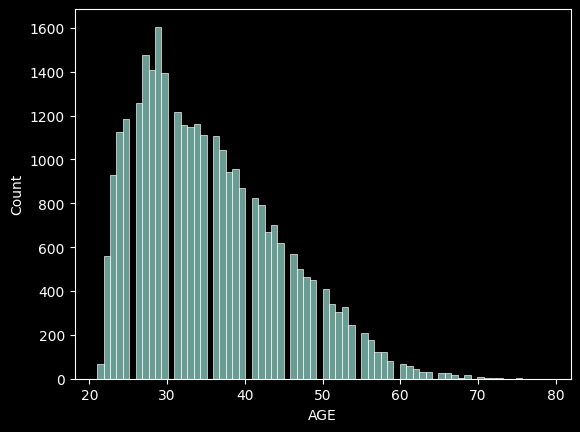

In [9]:
sns.histplot(new_df['AGE']);

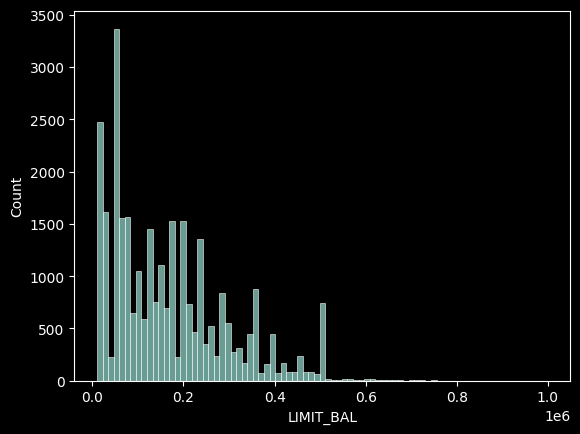

In [10]:
sns.histplot(new_df['LIMIT_BAL']);

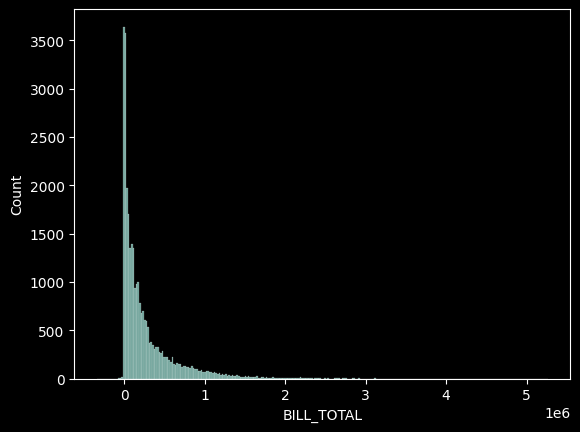

In [11]:
sns.histplot(new_df['BILL_TOTAL']);

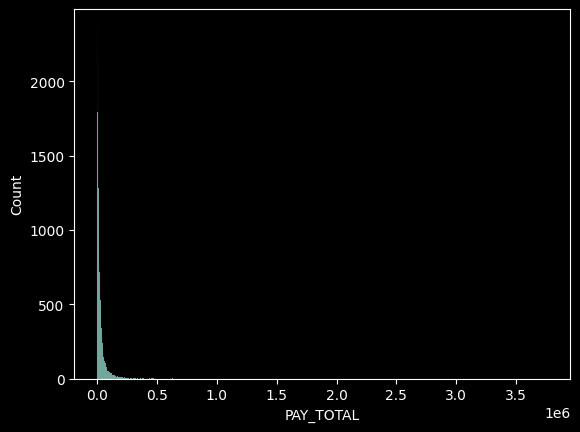

In [12]:
sns.histplot(new_df['PAY_TOTAL']);

## Treino e Teste

In [13]:
# Libs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import xgboost as xgb

In [14]:
# Separando a base de dados
X = new_df.drop(['LIMIT_BAL'], axis=1)
y = new_df['LIMIT_BAL']
X

,AGE,BILL_TOTAL,PAY_TOTAL
0,24,7704,689
1,26,17077,5000
2,34,101653,11018
3,37,231334,8388
4,57,109339,59049
...,...,...,...
29995,39,725349,42550
29996,43,21182,14490
29997,37,70496,31300
29998,41,266611,147181


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 3), (6000, 3), (24000,), (6000,))

## Criando o Regressor XGBoost

In [17]:
# Criar o objeto DMatrix (formato de dados otimizado para o XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [18]:
# Definir hiperparâmetros do modelo para regressão
params = {
    'objective': 'reg:squarederror',  # Problema de regressão
    'max_depth': 3,  # Profundidade máxima da árvore
    'eta': 0.1,  # Taxa de aprendizado
}

In [19]:
# Treinar o modelo
num_round = 100
model = xgb.train(params, dtrain, num_round)

In [20]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(dtest)

In [21]:
# Calcular o erro médio quadrático (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Erro Médio Quadrático (MSE): {mse}')

Erro Médio Quadrático (MSE): 10064951720.39657


## Tuning dos Parâmetros

In [22]:
# Lib
from sklearn.model_selection import GridSearchCV

In [23]:
# Defina o espaço de busca de hiperparâmetros
param_grid = {
    'booster': ['gbtree', 'gblinear', 'dart'],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}


In [24]:
# objeto XGBoost Regressor
xgb_tunado = xgb.XGBRegressor()

In [25]:
#pesquisa em grade com validação cruzada
grid_search = GridSearchCV(estimator=xgb_tunado, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [26]:
# Os melhores hiperparâmetros
best_params = grid_search.best_params_
print(f'Melhores hiperparâmetros: {best_params}')

Melhores hiperparâmetros: {'booster': 'gbtree', 'learning_rate': 0.01, 'n_estimators': 300}


In [27]:
# Treine o modelo com os melhores hiperparâmetros
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
# Avalie o modelo no conjunto de teste
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Erro Médio Quadrático (MSE) no conjunto de teste: {mse}')

Erro Médio Quadrático (MSE) no conjunto de teste: 9991529090.60454
